In [177]:
import sys
import ipywidgets as widgets

sys.path.append("/Users/octavia/Dropbox/SVE_v2/utilities")
sys.path.append("/Users/octavia/Dropbox/SVE_v2/model")

my_modules = ['plot_functions', 'load_model_output', 'search_functions']
for mod in my_modules:
    if mod in sys.modules: 
        del sys.modules[mod]


from search_functions import *
from load_model_output import *
from plot_functions import *

In [178]:
project_dir = "/Users/octavia/Dropbox/SVE_v2/"

dirs = os.listdir(os.path.join(project_dir , 'model_output/'))
dirs = list(set(dirs) - {'.DS_Store'})

select_base_name = widgets.Dropdown(
    options=dirs,
    description='base_name:',
    disabled=False,
)
select_base_name

Dropdown(description='base_name:', options=('test_inflow_dt', 'test_GW_GA', 'test_stripe', 'test_GW_phil', 'te…

In [193]:
base_name = select_base_name.value
base_dir = os.path.join(project_dir, 'model_output', base_name )

print_input_params(base_dir)

batch:
	p : 2.0
sim:
	dx : 1, 2
	dt_sw : 0.01, 0.005, 0.001
common:
	H_i : 0.0


In [194]:
core = load_sims(base_dir)
name_vars = get_name_vars(base_dir)
core = add_pretty_name(core, name_vars)

# core = patchy_update(core)


-9.673264079523847e-06


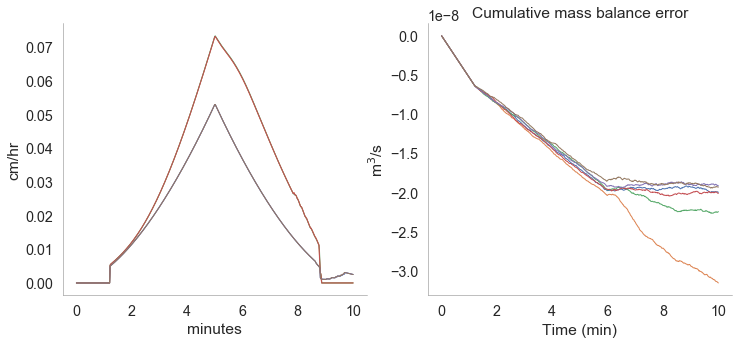

In [195]:
fig,  axes = plt.subplots(1,2, figsize = (12, 5))


plot_hydrographs(core, nonzero=True, ax= axes[0], label = False)

fig = summarize_mass_balance(core,ax= axes[1])
print(sim.mass_bal)

In [196]:

names =  get_name_tuples(core, name_vars)

select_key = widgets.Dropdown(
        options=names,
        description='Name:')
select_key

Dropdown(description='Name:', options=(('dx=1, dt_sw=0.001', 'p-2.0/dt_sw-0.001,dx-1/'), ('dx=2, dt_sw=0.01', …

In [197]:
core.runtime_hr

p-2.0/dt_sw-0.001,dx-1/    0.331455
p-2.0/dt_sw-0.01,dx-2/     0.009078
p-2.0/dt_sw-0.005,dx-2/    0.017740
p-2.0/dt_sw-0.001,dx-2/    0.081183
p-2.0/dt_sw-0.005,dx-1/    0.073773
p-2.0/dt_sw-0.01,dx-1/     0.038252
Name: runtime_hr, dtype: float64

In [198]:
key = select_key.value
print(key)
sim = core.loc[key]

p-2.0/dt_sw-0.001,dx-1/


(<matplotlib.axes._subplots.AxesSubplot at 0x1a29470090>,
 <matplotlib.collections.QuadMesh at 0x1a29fbb2d0>)

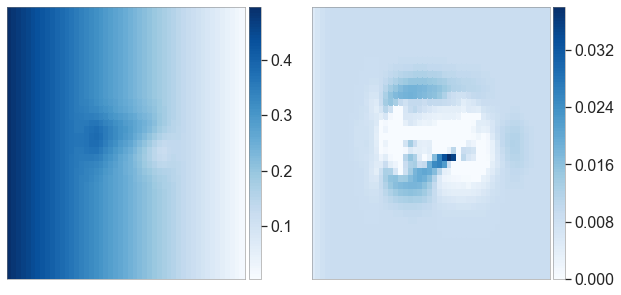

In [199]:

fig,  axes = plt.subplots(1,2, figsize = (10, 5))

arraycolor(sim.zc, axes[0])
# axes[1].imshow(sim.uc.max(0))
arraycolor(sim.uc.max(0), axes[1])

# plt.colorbar()

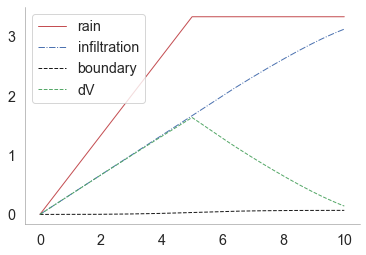

In [200]:
plt.plot(sim.t_h / 60., np.cumsum(sim.rain_series)*sim.area, 'r-', label = "rain")
plt.plot(sim.t_h / 60., np.cumsum(sim.infl_1d ), 'b-.', label = "infiltration")
plt.plot(sim.t_h / 60., np.cumsum(sim.boundary_flux_1d), 'k--', label = "boundary")
plt.plot(sim.t_h / 60., np.cumsum(sim.dvol_1d), 'g--', label = "dV")
plt.legend()

In [201]:

if sim.fV < 1:
    triptych(sim)

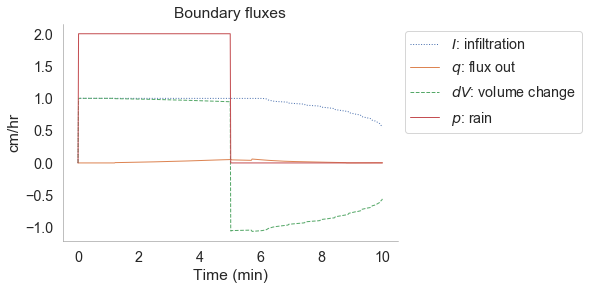

In [202]:
fig = summarize_fluxes(sim)

In [203]:

def plot_fluxes(sim):
    """
    Plot to check boundary fluxes
    """
    fig, axes = plt.subplots(1, 2, figsize=(13, 4))
    ax = axes[0]

    scale = 3.6e5/sim.Lx/sim.Ly
    ax.plot(sim.t_h / 60., sim.flux1 * scale, label="$1$")
    ax.plot(sim.t_h / 60., sim.flux2 * scale, label="$2$")
    ax.plot(sim.t_h / 60., sim.flux3 * scale, label="$3$")
    ax.plot(sim.t_h / 60., sim.flux4 * scale, label="$4$")
    ax.set_ylabel("cm/hr")
    ax.set_xlabel("Time (min)")
    ax.set_title("Fluxes 1-4")
    ax.legend()

    ax = axes[1]
    test_flux = - sim.flux1 + sim.flux2 + sim.flux3 - sim.flux4
    ax.plot(sim.t_h / 60., test_flux * scale, label="$q$(1-4)")
    ax.plot(sim.t_h / 60., sim.boundary_flux_1d  * scale, '--',
            label="$q$(total)")
    ax.plot(sim.t_h / 60., sim.flux3 * scale, '--',
            label="hydrograph")

    ax.legend()
    ax.set_xlabel("Time (min)")
    ax.set_title("Check total boundary flux")

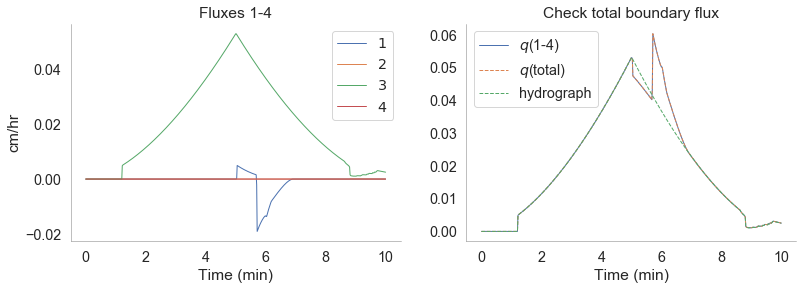

In [204]:
fig = plot_fluxes(sim)

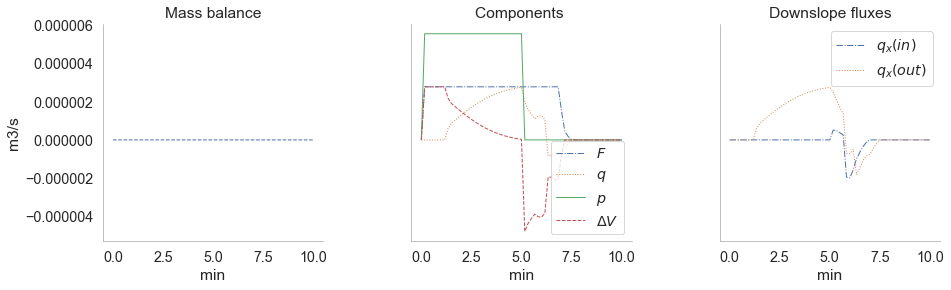

In [205]:
check_cell_fluxes(sim, yi = 0, xi=0);

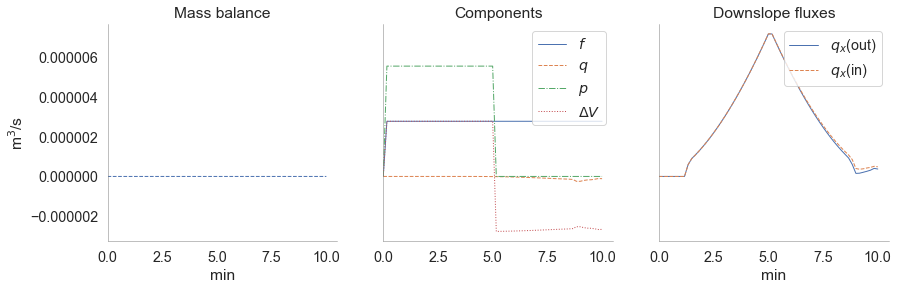

In [206]:
check_band_fluxes(sim, xi = -1);

## Compare `qc = hc*vc` (cell center flux), and `yflux0`... (fluxes at cell edges)

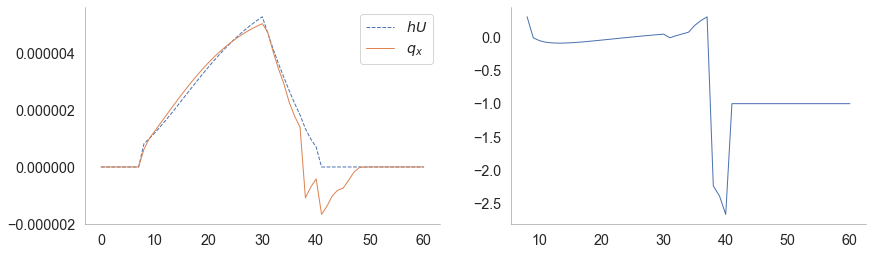

In [207]:
fig, axes = plt.subplots(1, 2, figsize = (14, 4))

ind = 2
qc = (sim.hc*sim.uc).mean(1)[:,ind]
# q_interp = (sim.xflux0.mean(1)[:,ind] + sim.xflux1.mean(1)[:,ind])/2
q_interp = sim.xflux0.mean(1)[:,ind] 

ax = axes[0]
ax.plot(qc, '--', label = "$hU$")
ax.plot(q_interp, label = "$q_x$")
ax.legend()

ax = axes[1]
ax.set_title("")
ax.plot((qc - q_interp)/q_interp)